# Tutorial: Data Visualization in Python with Seaborn

## Author: Joanna Yao (xinyao@andrew.cmu.edu)

## Introduction

This tutorial provides an overview of statistical data visualization in Python using a library called [seaborn](https://seaborn.pydata.org/). Data visualization is an important component in data science, and is usually the first step in a data analysis process after data collection and preprocessing. It allows researchers to have a quick sense of the distribution of their data and potential relationships, which helps shed a light on directions of further analysis on the data. Data visualization is also a powerful yet intuitive way of presenting data and conveying messages to any target audience.

The tutorial will briefly introduce different choices of graphs, explain their advantages, disadvantages, the scenarios under which they can be used, as well as ways to code them using seaborn. After the tutorials, readers will have a basic understanding of common data visualization methods and be able to implement and customize them in Python using seaborn.

## Overview

The tutorial consists of the following sections:
1.  [Installing and Importing Seaborn](#1)
2.  [Loading the Data](#2)
3.  [Visualization: 1D Quantitative Data](#3)
4.  [Visualization: Incorporating Categorical Data into 1D Quantitative Data](#4)
5.  [Visualization: 1D Categorical Data](#5)
6.  [Visualization: Incorporating More Dimensions of Categorical Data](#6)
7.  [Visualization: 2D Quantitative Data](#7)
8.  [Higher Dimensional Data in General](#8)
9. [Seaborn vs Matplotlib vs Other Choices](#9)

<a id="1"></a>
## 1. Installing and Importing Seaborn

First, let's install seaborn on our working machine. Seaborn is only supported on Python 3.6+. To check your python version, run the following code chunk or copy the command (without the exclaimation mark) and run it from command line.

In [3]:
!python -V

Python 3.8.8


If you need to install or upgrade Python, check out [the official website](https://www.python.org/downloads/).

Once the correct Python version has been installed, we can install the library from `PyPI` or `Anaconda` by running one of the following two lines of code or copying one of the two commands (without the exclamation mark) and run it from the command line. Remember to comment out one of them!

In [ ]:
# installing using pip
!pip install seaborn

# installing using conda
#!conda install seaborn

Required dependencies of seaborn include [NumPy](https://numpy.org/), [SciPy](https://www.scipy.org/), [pandas](https://pandas.pydata.org/), and [matplotlib](https://matplotlib.org/). When seaborn is installed, it will check for these required libraries and install them if needed, so there're no extra actions required on your end. If you run into any trouble during installation, visit [Installing and getting started](https://seaborn.pydata.org/installing.html) on seaborn's official website for more information.

After successful installation, we will load the libraries by running the following code. According to recommendations on seaborn's official website, we will import both seaborn and its four required dependencies for more comprehensive functionalities.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id="2"></a>
## 2. Loading the Data

Our second step is to load the data. The sample data we will be using in this tutorial is the daily data on the COVID-19 pandemic in California, Pennsylvania and Massachusetts, United States, from which is provided by [the COVID Tracking Project at The Atlantic](https://covidtracking.com/data/download) under a [Creative Commons CC BY 4.0](https://creativecommons.org/licenses/by/4.0/) license.

In [515]:
# read the data from the csv files
covid_ca = pd.read_csv("https://covidtracking.com/data/download/california-history.csv")
covid_pa = pd.read_csv("https://covidtracking.com/data/download/pennsylvania-history.csv")
covid_ma = pd.read_csv("https://covidtracking.com/data/download/massachusetts-history.csv")
# concatenate two data frames 
covid = pd.concat([covid_ca, covid_pa, covid_ma])

To keep our demonstration simple, we will retain six variables as shown below, and only keep observations between April 1st, 2020 to December 31st, 2020. For demonstration purpose, we will add another categorical variable, `hospitalizedLevel`, based on `hospitalizedCurrently`.

In [532]:
# retain only the five columns listed
covid = covid[["date", "state", "deathIncrease", "hospitalizedCurrently", "totalTestResultsIncrease"]]

# change the date from string to datetime
covid["date"] = pd.to_datetime(covid["date"], format = "%Y-%m-%d")

# keep data between 2020-04-01 to 2020-12-31
covid = covid[(covid["date"] >= "2020-04-01") & (covid["date"] <= "2020-12-31")]

# add a new column hospitalizedLevel
def addHospitalizedLevel(row):
    if row["hospitalizedCurrently"] >= 10000:
        return "high"
    elif row["hospitalizedCurrently"] < 5000:
        return "low"
    else:
        return "medium"
covid["hospitalizedLevel"] = covid.apply(addHospitalizedLevel, axis = 1)

# specify categorical variables
covid = covid.astype({"state": "category", "hospitalizedLevel":"category"})

# show first five row of the data frame
covid.head()

<ipython-input-532-80b68f5cbb46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["date"] = pd.to_datetime(covid["date"], format = "%Y-%m-%d")


,date,state,deathIncrease,hospitalizedCurrently,totalTestResultsIncrease,hospitalizedLevel
66,2020-12-31,CA,428,21449.0,232406,high
67,2020-12-30,CA,432,21433.0,248605,high
68,2020-12-29,CA,242,21240.0,245955,high
69,2020-12-28,CA,64,20642.0,301820,high
70,2020-12-27,CA,237,20059.0,380154,high


In [66]:
# show dimension of the data frame
covid.shape

(825, 6)

As shown above, our final data frame consists of 825 rows (observations) and 6 columns (variables). The columns contain `date`, two categorical variables `state` and `hospitalizedLevel`, and four quantitative variables `deathIncrease`, `hospitalizedCurrently`, and `totalTestResultsIncrease`.

Now that we have preprocessed our data, we will move on to using seaborn for visualization.

<a id="3"></a>
## 3. Visualization: 1D Quantitative Data

When we have a 1D quantitative data, some information we may be interested in include its mean (average), median (50% quantile), range, spread, shape of distribution, etc. Below we will see several methods that focus on different information.

### (a) Histogram

A histogram can show the distribution of a quantitative variable. On the x-axis is the variable we are visualizing, whose values are separated into different bins, i.e. consecutive disjoint intervals, and on the y-axis is usually the count or density of the observations that fall into each bin. 

Let's try to visualize the distribution of `deathIncrease`, the increase in death counts in a state in a day.

<AxesSubplot:xlabel='deathIncrease', ylabel='Count'>

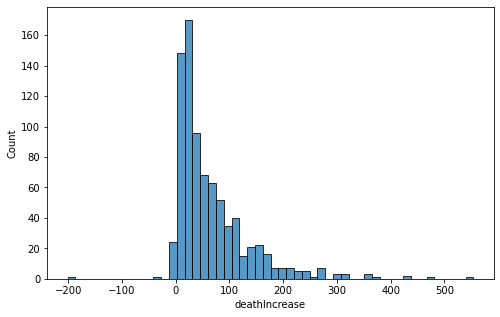

In [538]:
# set the figure size using matplotlib
plt.figure(figsize=(8, 5))

# histogram with count on the y-axis
sns.histplot(x = "deathIncrease", data = covid)

By default, `histplot` puts count on the y-axis. If we want to put the density on the y-axis, we just need to specify `stat = "density"` in our function call, which normalizes the counts to make the total area of bins equal to 1.

<AxesSubplot:xlabel='deathIncrease', ylabel='Density'>

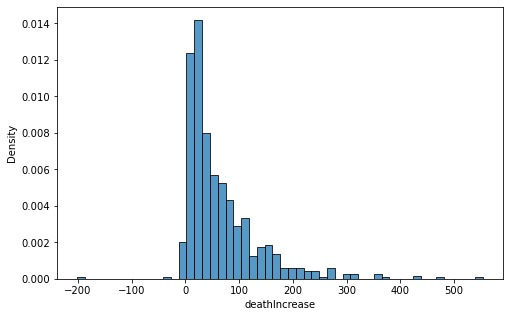

In [540]:
plt.figure(figsize=(8, 5))

# histogram with density on the y-axis
sns.histplot(x = "deathIncrease", data = covid, stat = "density")

There are two other values we can use for the `stat` argument: `frequency`, which is the count of each bin divided by the bin width, and `probability`, which normalizes the counts to make the total height of bars equal to 1.

We can easily change the width of the bins by specifying `bins` or `binwidth`. If `bins` is set to one value, the histogram uses this value as the total number of bins. If `bins` is set to a vector or tuple of values, the histogram uses these values as the breaks of the bins, i.e. values at which to create new bins. Using the second method, we can also make bins have different widths.

<AxesSubplot:xlabel='deathIncrease', ylabel='Count'>

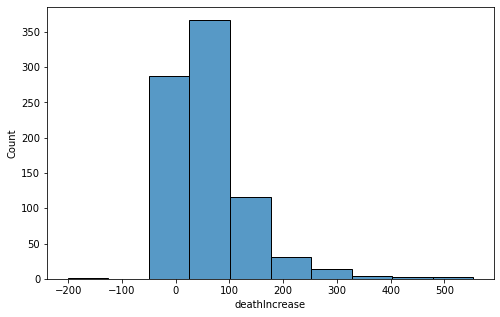

In [541]:
plt.figure(figsize=(8, 5))

# specify the total number of bins
sns.histplot(x = "deathIncrease", data = covid, bins = 10)

<AxesSubplot:xlabel='deathIncrease', ylabel='Count'>

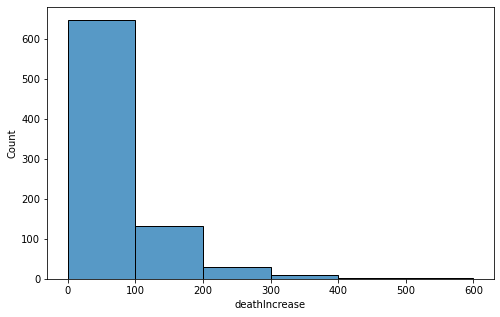

In [542]:
plt.figure(figsize=(8, 5))

# specify the breaks of the bins
sns.histplot(x = "deathIncrease", data = covid, 
             bins = (0, 100, 200, 300, 400, 500, 600))

`binwidth` allows us to control the width of each bin. If both `bins` and `binwidth` are specified, `binwidth` will override `bins`.

<AxesSubplot:xlabel='deathIncrease', ylabel='Count'>

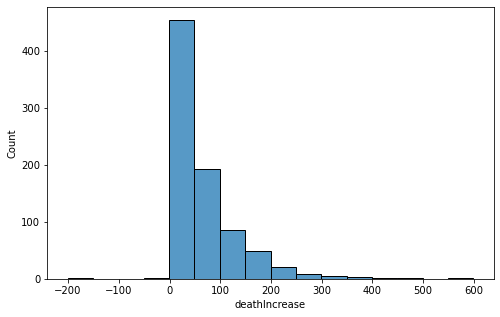

In [543]:
plt.figure(figsize=(8, 5))

# specify the width of each bin
sns.histplot(x = "deathIncrease", data = covid, binwidth = 50)

Sometimes we don't want to show all values of the variable on the x-axis. We can specify the smallest and the largest bin edges using `binrange`.

<AxesSubplot:xlabel='deathIncrease', ylabel='Count'>

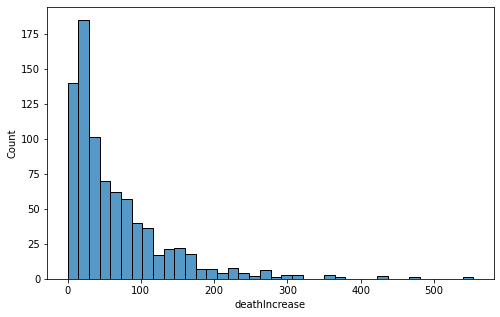

In [545]:
plt.figure(figsize=(8, 5))

# limit the histogram to between 0 and the maximum value of deathIncrease
sns.histplot(x = "deathIncrease", data = covid, 
             binrange = (0, max(covid["deathIncrease"])))

We can also overlay a smoothed density curve on the histogram by setting `kde = True`. Note that since we are adding a density curve, it only makes sense if we put `density` on the y-axis of the histogram.

<AxesSubplot:xlabel='deathIncrease', ylabel='Density'>

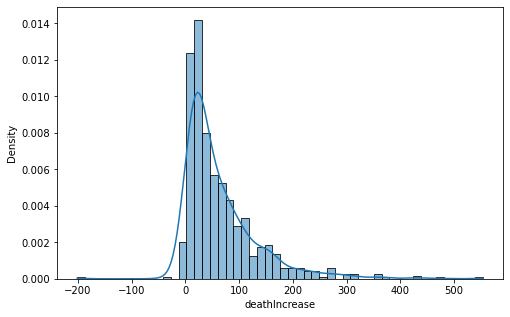

In [544]:
plt.figure(figsize=(8, 5))

# histogram with density on the y-axis and kernel density estimate overlayed
sns.histplot(x = "deathIncrease", data = covid, stat = "density", kde = True)

To change the color of the bins, we can specify the `color` argument.

<AxesSubplot:xlabel='deathIncrease', ylabel='Count'>

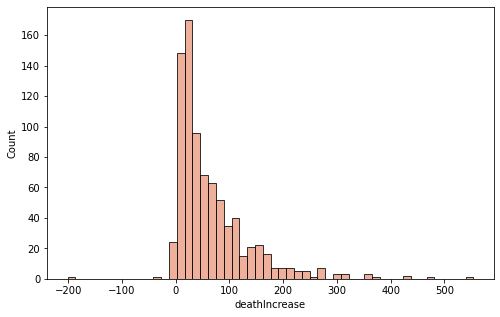

In [546]:
plt.figure(figsize=(8, 5))

# histogram with a different color
sns.histplot(x = "deathIncrease", data = covid, color = "darksalmon")

For a comprehensive list of arguments for `histplot`, check out [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html).

### (b) Density Curve

We can of course plot a smoothed density curve alone. Similar to histograms, a density curve is useful if we want to see the shape of the distribution. `kdeplot` generates a kernel density estimate curve using Gaussian kernels for the given data, and we have the freedom to choose the smoothing parameters.

Let's try to plot a kernel density estimate curve of `deathIncrease` with default parameters first. The curve we get here is the same as the curve we overlayed on the histogram earlier.

<AxesSubplot:xlabel='deathIncrease', ylabel='Density'>

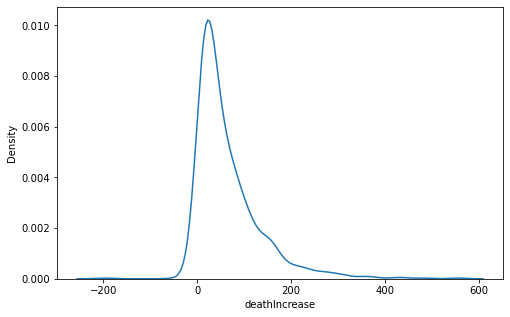

In [547]:
plt.figure(figsize=(8, 5))

# kernal density estimate
sns.kdeplot(x = "deathIncrease", data = covid)

We can change the color of the curve using the `color` argument. If we want to fill the area under curve, we just need to set `shade = True`. Seaborn will automatically use a filling color that is of the same shade with the color of the curve.

<AxesSubplot:xlabel='deathIncrease', ylabel='Density'>

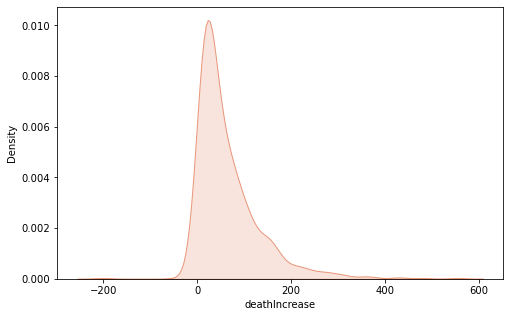

In [548]:
plt.figure(figsize=(8, 5))

# kernal density estimate with area under curve filled
sns.kdeplot(x = "deathIncrease", data = covid, 
            color = "darksalmon", fill = True)

We can specify the minimum and maximum value on the x-axis in a density curve plot using the `clip` argument.

<AxesSubplot:xlabel='deathIncrease', ylabel='Density'>

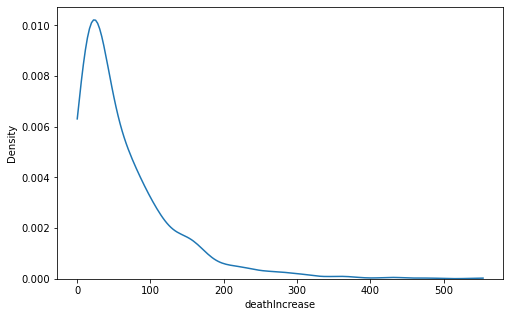

In [549]:
plt.figure(figsize=(8, 5))

# limit the density curve to between 0 and the maximum value of deathIncrease
sns.kdeplot(x = "deathIncrease", data = covid, 
            clip = (0, max(covid["deathIncrease"])))

To change the smoothing bandwidth, we use the `bw_method` argument. This argument will be passed to the `gaussian_kde` function in Scipy, which handles the calculation of the estimator bandwidth. For more information, check out [scipy.stats.gaussian_kde](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html#scipy.stats.gaussian_kde).

We can also use `bw_adjust` to control the level of smoothing we want. Larger values correspond to more smoothing and vice versa. 

<AxesSubplot:xlabel='deathIncrease', ylabel='Density'>

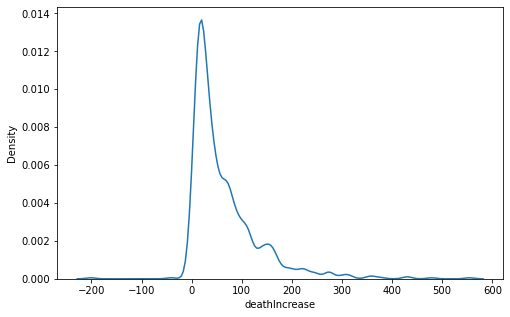

In [550]:
plt.figure(figsize=(8, 5))

# less smoothing
sns.kdeplot(x = "deathIncrease", data = covid, bw_adjust = 0.5)

<AxesSubplot:xlabel='deathIncrease', ylabel='Density'>

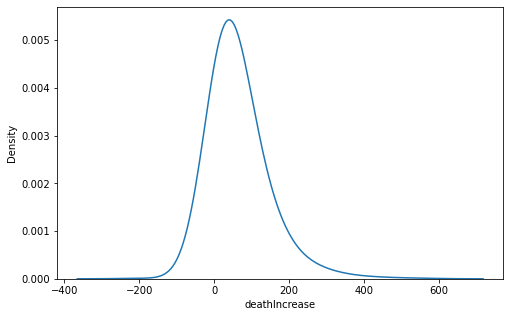

In [551]:
plt.figure(figsize=(8, 5))

# more smoothing
sns.kdeplot(x = "deathIncrease", data = covid, bw_adjust = 3)

The kernel density curve we get from `kdeplot` estimates the probability density function of the original distribution, but we can also estimate the cumulative distribution function by setting `cumulative = True`.

<AxesSubplot:xlabel='deathIncrease', ylabel='Density'>

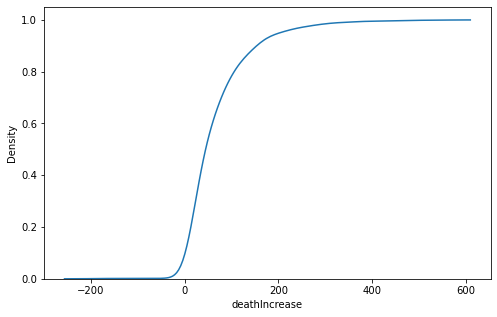

In [552]:
plt.figure(figsize=(8, 5))

# estimate the cumulative density
sns.kdeplot(x = "deathIncrease", data = covid, cumulative = True)

We used to be able to choose non-gaussian kernels for density estimate, but unfortunately it's no longer supported. If we want to use non-Gaussian kernels, we can either use statsmodels or scikit-Learn. 

For a comprehensive list of arguments for `kdeplot`, check out [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

### (c) Box Plot

The two methods above are good for visualizing the shape of the distribution. They can also visualize the number of modes in a distribution. However, they are not that good at showing statistics such as median and outliers. If we want to visualize the "summary" statistics of a distribution and do not care about the shape, we can resort to box plots.

A box plot shows the "five-number summary" of a distribution, which includes the minimum, the first quartile (25% quantile), the median (50% quantile), the third quartile (75% quantile), and the maximum. It also marks the outliers separately.

<AxesSubplot:xlabel='deathIncrease'>

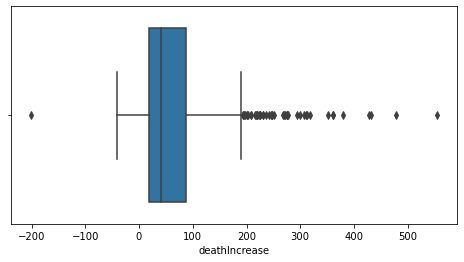

In [567]:
plt.figure(figsize=(8, 4))

# box plot - horizontal
sns.boxplot(x = "deathIncrease", data = covid)

In the plot above, the line inside the box is the median. The left and right edge of the box is the first and third quartile, respectively. The two lines extending out from the box are called whiskers. The endpoint of the left whisker is either the minimum value, or Q1 - 1.5IQR (the first quartile minus 1.5 times the interquartile range), in other words the minimum value that is not considered an outlier. Similarly, the endpoint of the right whisker is either the maximum value, or Q3 + 1.5 IQR. The points outside the whiskers are outliers.

We can flip the box plot easily by specifying the data as argument `y`, instead of `x`. Needless to say, we can change the color of the box using `color`.

<AxesSubplot:ylabel='deathIncrease'>

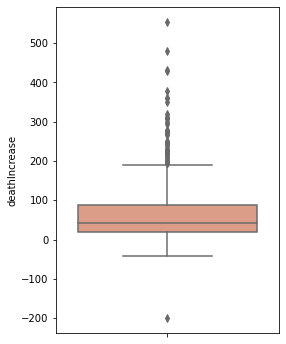

In [574]:
plt.figure(figsize=(4, 6))

#box plot - vertical
sns.boxplot(y = "deathIncrease", data = covid, color = "darksalmon")

For a comprehensive list of arguments for `boxplot`, check out [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot).

Below are three more choices that may not be as commonly used as those above, in case you are interested. All three plots below, as well as box plots, are mostly used when we are visualizing the distribution of a quantitative variable under different categories. We will revisit them when we talk about incorporating a categorical variable into 1D quantitative data later.

### (d) Strip Plot

A strip plot is a variation of a dot plot, which plots every single observation. The density of a value is visualized as the literal density of points on the plot at a given x value. The x-coordinate of each point in a strip plot is its value of variable on the x-axis, but the y-coordinate is meaningless. The points are spread out on the y-axis only to make the points overlap less.

<AxesSubplot:xlabel='deathIncrease'>

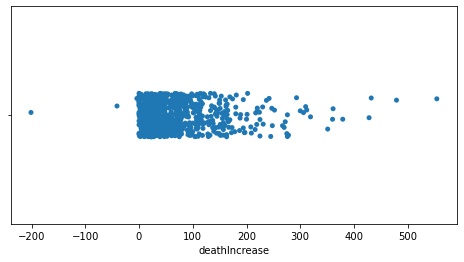

In [568]:
plt.figure(figsize=(8, 4))

# strip plot
sns.stripplot(x = "deathIncrease", data = covid)

We can control how spread out the points are along the meaningless axis by setting the `jitter` argument. `jitter = 0` means no spread alone the meaningless axis at all, in this case it means all points will be on the same horizontal line. `jitter = 1` or `jitter = True` is the default value used. Any other value in range \[0, 1) means the amount of jitter, so larger value means points that are more spread out.

<AxesSubplot:xlabel='deathIncrease'>

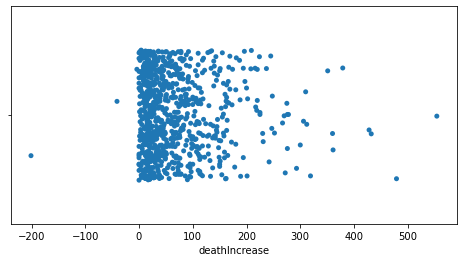

In [569]:
plt.figure(figsize=(8, 4))

# strip plot with more jitter
sns.stripplot(x = "deathIncrease", data = covid, jitter = 0.3)

It is not very meaningful to use a strip plot alone since it does not give much valuable information other than an intuitive view of the density of points at different values and it does not scale well. However, we can overlay it on a box plot as a complement, since a box plot does not visualize density. In the plot below, the color and transparency of the points in the strip plot are changed using the `color` and `alpha` arguments so that we can still see the box plot.

<AxesSubplot:xlabel='deathIncrease'>

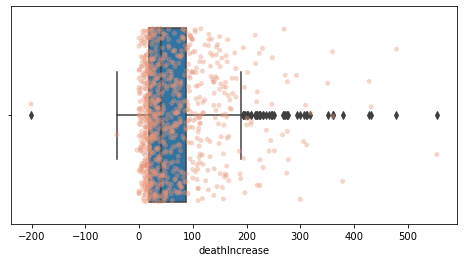

In [570]:
plt.figure(figsize=(8, 4))

# strip plot on top of box plot
sns.boxplot(x = "deathIncrease", data = covid)
sns.stripplot(x = "deathIncrease", data = covid, 
              color = "darksalmon", jitter = 0.4, alpha = 0.4)

We can still flip the coordinates of a strip plot by specifying the data as the `y` argument.

<AxesSubplot:ylabel='deathIncrease'>

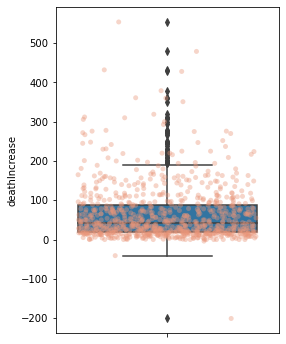

In [573]:
plt.figure(figsize=(4, 6))

# strip plot on top of box plot, coordinates flipped
sns.boxplot(y = "deathIncrease", data = covid)
sns.stripplot(y = "deathIncrease", data = covid, 
              color = "darksalmon", jitter = 0.4, alpha = 0.4)

For a comprehensive list of arguments for `stripplot`, check out [seaborn.stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot).

### (e) Swarm Plot

A swarm plot is similar to a strip plot - it also plots every point, but it spreads the points out more at values with higher densities. Note that swarm plots are extremely unscalable. In the code below, we only plot the first 300 observations. If we include more points than can be placed on the plot, we will receive a warning to either decrease the point size or use a strip plot instead. We can control the point size using the `size` argument.

<AxesSubplot:xlabel='deathIncrease'>

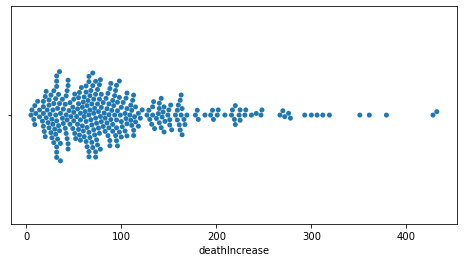

In [575]:
plt.figure(figsize=(8, 4))

# swarm plot
sns.swarmplot(x = "deathIncrease", data = covid.iloc[0:300,])

We can flip the coordinates of a swarm plot or overlay it on top of a box plot using the same methods mentioned earlier.

<AxesSubplot:ylabel='deathIncrease'>

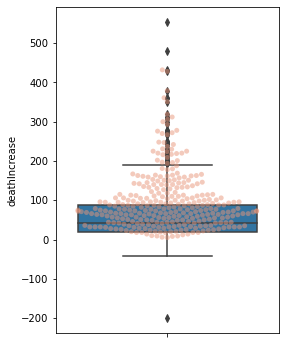

In [577]:
plt.figure(figsize=(4, 6))

# swarm plot on top of box plot, coordinates flipped
sns.boxplot(y = "deathIncrease", data = covid)
sns.swarmplot(y = "deathIncrease", data = covid.iloc[0:300,], color = "darksalmon", alpha = 0.5)

For a comprehensive list of arguments for `swarmplot`, check out [seaborn.swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html).

### (f) Violin Plot

A violin plot can be seen as the combination of a box plot and density curves. By adding the kernel density estimate to each side of the (modified) box plot, it makes up for a box plot's disadvantage of not showing the shape of the underlying distribution.

<AxesSubplot:xlabel='deathIncrease'>

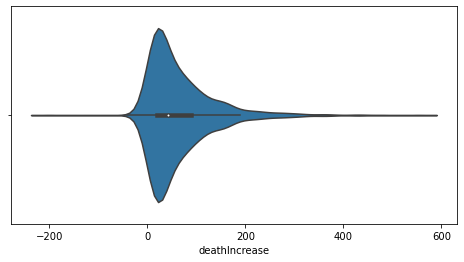

In [578]:
plt.figure(figsize=(8, 4))

# violin plot
sns.violinplot(x = "deathIncrease", data = covid)

In the violin plot above, the white dot at the center is the median. The black box and the whiskers have the same meanings as those in a box plot. You may also have noticed that the density curve is similar to what we get from calling `kdeplot`.

The `inner` argument of `violinplot` controls how the summary information are visualized. By default, it has value `"box"`, which results in a mini box plot inside the violin. We can also change it to `"quartile"` to explicitly draw the three quartiles as lines, although the endpoints of the whiskers are not visualized in this case.

<AxesSubplot:xlabel='deathIncrease'>

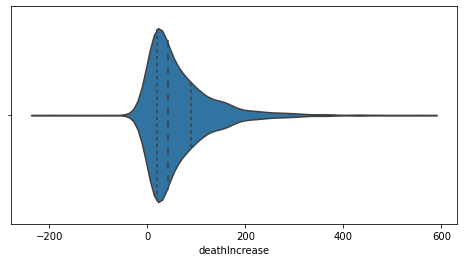

In [579]:
plt.figure(figsize=(8, 4))

# violin plot
sns.violinplot(x = "deathIncrease", data = covid, inner = "quartile")

For a comprehensive list of arguments for `violinplot`, check out [seaborn.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

<a id="4"></a>
## 4. Visualization: Incorporating Categorical Data into 1D Quantitative Data

Recall that our data comes from three states: California, Pennsylvania, and Massachusetts. What if we want to visualize the distribution of `deathIncrease` conditioned on each state, and maybe compare the distributions among different states? In this section, we will see how to easily achieve this by modifying what we have plotted above.

One of the tricks here is to use the `hue` argument in most of seaborn's plotting functions, and use the `multiple` argument to decide how multiple elements are positioned. By passing in a categorical variable to `hue`, we are essentially telling seaborn that we want to color our plot according to the value of this categorical variable. Another trick is to separate a plot into different subplots, the exact method of which varies from plot to plot. We will see what that means in different plots soon.

In the examples below, we will visualize the distribution of `deathIncrease` conditioned on `state`.

### (a) Variations of Histogram

We can change our histograms in several ways to reflect the additional dimension of data, the categorical variable `state`. First of all, we can seperate each bin into different "sections", each section corresponding to one category of `state`. All we need to do is to pass the categorical variable into the `hue` argument, and change the `multiple` argument as needed.

By default, the value of `multiple` is `"layer"`, which means bins of different categories are layer together and all start from y = 0.

<AxesSubplot:xlabel='deathIncrease', ylabel='Count'>

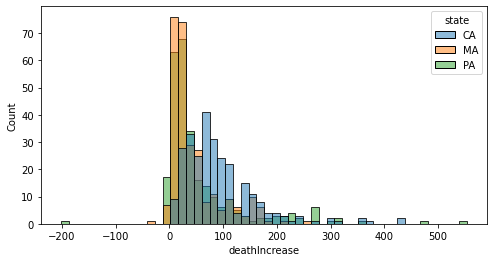

In [580]:
plt.figure(figsize=(8, 5))

# layered histogram
sns.histplot(x = "deathIncrease", data = covid, hue = "state")

If we want the bins to stack together instead of overlapping, we can set `multiple = "stack"`. Beware using stacked histograms though - since bars of some colors do not start at the bottom of y-axis, things can get tricky when we try to see the conditional distribution of categories that are not at the bottom. It is also not very useful in terms of comparing conditional distribution given different categories.

<AxesSubplot:xlabel='deathIncrease', ylabel='Count'>

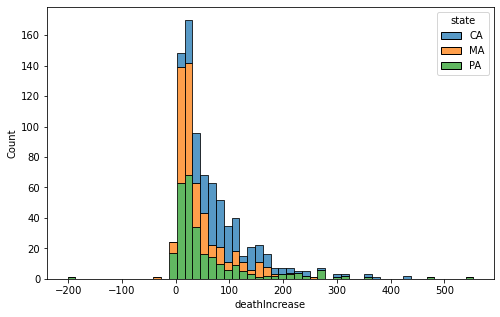

In [581]:
plt.figure(figsize=(8, 5))

# stacked histogram
sns.histplot(x = "deathIncrease", data = covid, 
             hue = "state", multiple = "stack")

We can also make every bin have the same height, 1, which means what is on the y-axis now is the conditional probability of different values of `state` given a bin of values for `deathIncrease`. To do this, we use `multiple = "fill"`. By default, the y-axis label is count, which is not what we have on the y-axis here, so we need to manually change the label using the function `set`. 

However, this kind of histogram can be confusing at times because despite the fact that each category has a separate color, we cannot really see the conditional distribution of `deathIncrease` under each category. What we actually see is the conditional distribution of `state` given a value of `deathIncrease`. 

This can be counterintuitive, so if the conditional distribution of a categorical variable given a quantitative variable is what you want to visualize, be sure to make it clear in the description so that you readers won't misinterpret it as the other way around.

[Text(0, 0.5, 'conditional probability')]

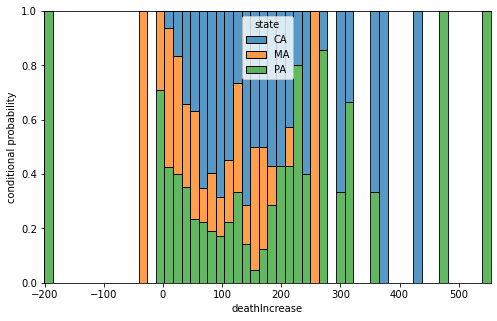

In [582]:
plt.figure(figsize=(8, 5))

# histogram showing conditional probability of each category at each bin
sns.histplot(x = "deathIncrease", data = covid, 
             hue = "state", multiple = "fill").set(ylabel = "conditional probability")

Another option is to facet the histogram, i.e. split one histogram into different subplots, each for a category. We do this by 1) using the `displot` function instead of `histplot`, which is used to facet plots for distributions into different subplots, and 2) passing the categorical variable into the `row` or `col` argument, depending on if we want to facet the plots on rows or on columns.

Since we have two arguments to specify how to facet the histograms, we can essentially add two categorical variables to a faceted histogram by passing one to `row` and one to `col`. This will result in the histogram being facetted on each combination of categories of these two categorical variables.

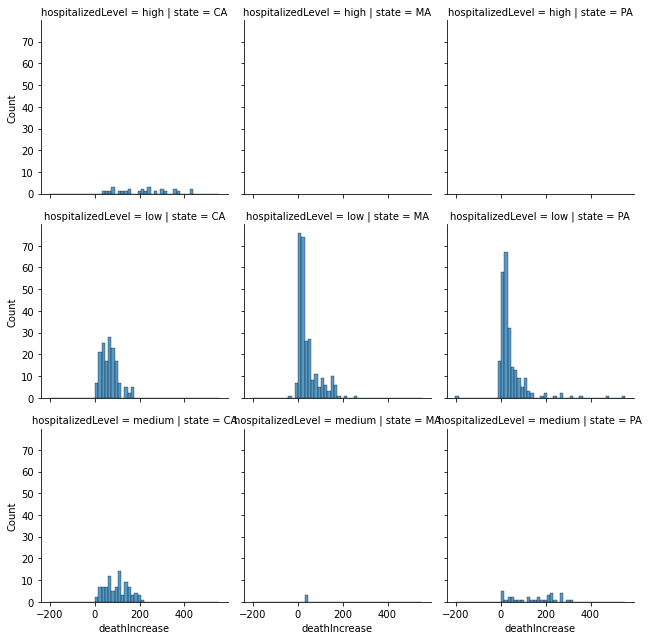

In [589]:
# facetted histogram on two categorical variable
sns.displot(x = "deathIncrease", data = covid, 
            row = "hospitalizedLevel", col = "state", height = 3)

### (b) Variations of Density Curve

To plot a separate curve of the given quantitative variable for each category of a categorical variable, we use the exact same argument, `hue`, in our function call to `kdeplot`.

Note that here, each curve is not really a density curve, because the area under curve for each curve is not 1. It is the total area under curve for all curves that equals to 1. Therefore, what we have here is not really the conditional density. If we want the plot the conditional density of `deathIncrease` given `state = MA` instead, we would pass in a subset of the data that only contains observations with `state = MA` to our function call.

<AxesSubplot:xlabel='deathIncrease', ylabel='Density'>

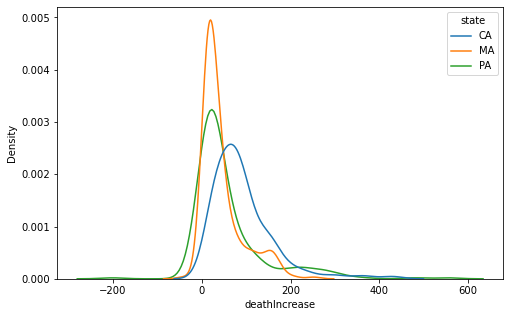

In [590]:
plt.figure(figsize=(8, 5))

# kernal density estimate
sns.kdeplot(x = "deathIncrease", data = covid, hue = "state")

Same as what we did for the histograms, we can set `multiple` to `"stack"` or `"fill"` if we prefer. Just make sure you have kept their limitations in mind. If we want to facet the density curves, we can use the exact same code for facetting histograms, except that we use `kind = "kde"` to tell seaborn that we want the kernel density estimates, not the histograms, which will be plotted by default. 

However, note that what we did below is in general not a good example of data visualization, because people may accidentally think that each plot is a conditional density curve, when in fact they are not (the area under curve for each plot is not 1).

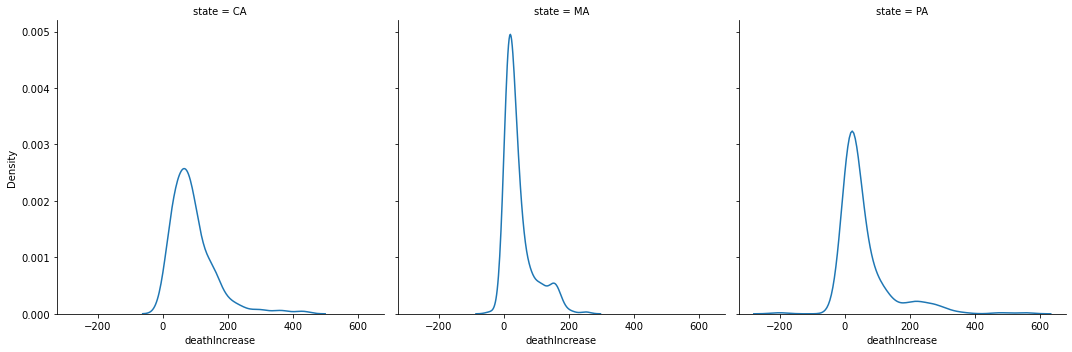

In [293]:
# facetted density curve
sns.displot(x = "deathIncrease", data = covid, 
            col = "state", kind = "kde")

### (c) Variations of Box Plot

Adding another categorical variable to a box plot is a common practice and is very useful, since we can easily compare the quartiles of the given quantitative variable under different categories by making one box for each category and putting them side by side. To achieve this, we put the quantitative variable on one of the axes, and the categorical variable on the other.

<AxesSubplot:xlabel='state', ylabel='deathIncrease'>

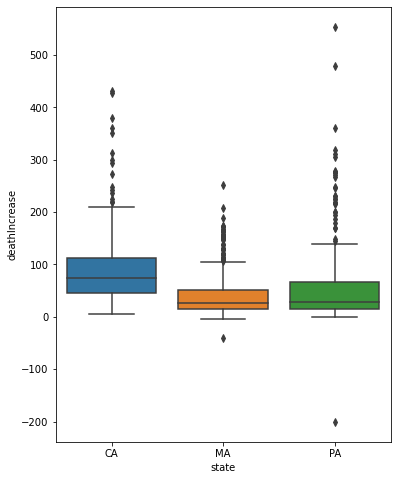

In [597]:
plt.figure(figsize=(6, 8))

# side-by-side box plot
sns.boxplot(x = "state", y = "deathIncrease", data = covid)

We can add another categorical variable to the box plot by specifying `hue`.

<AxesSubplot:xlabel='state', ylabel='deathIncrease'>

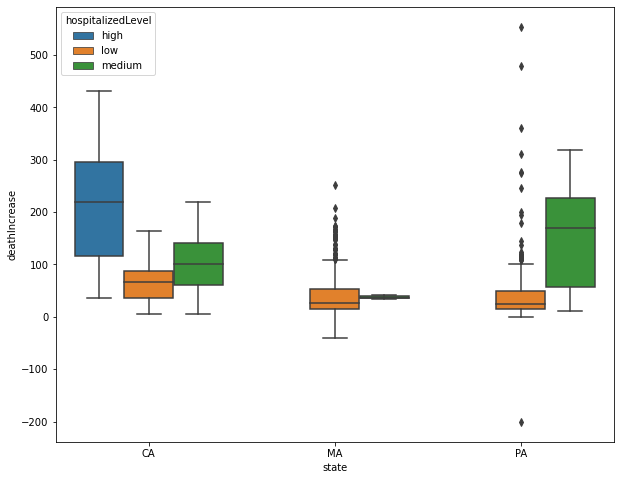

In [600]:
plt.figure(figsize=(10, 8))

# side-by-side box plot grouped by two categorical variables
sns.boxplot(x = "state", y = "deathIncrease", data = covid, 
            hue = "hospitalizedLevel")

Just like earlier plots, we can facet a box plot into different subplots. The function we use here is `catplot`, which is used to facet categorical plots into different subplots.

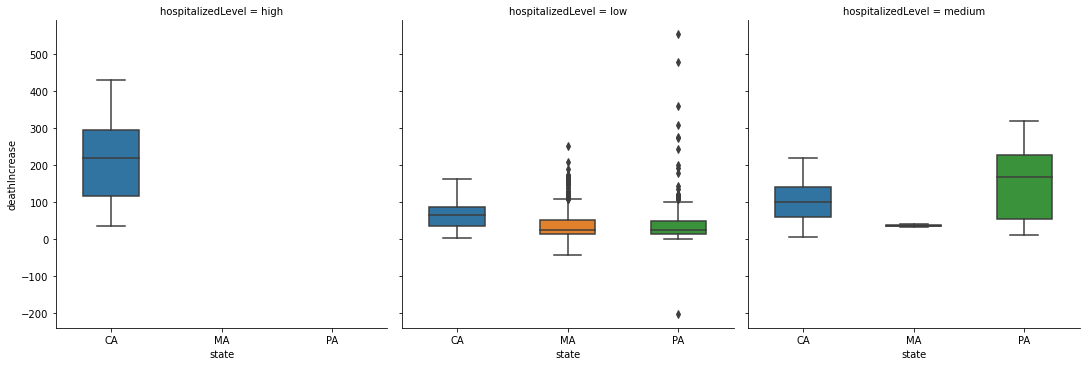

In [603]:
# facetted box plots
sns.catplot(x = "state", y = "deathIncrease", data = covid, 
            col = "hospitalizedLevel", kind = "box", width = 0.5)

Similarly, if we want to facet a strip/swarm/violin plot, we can use the same code with the `kind` argument set to `"strip"`, `"swarm"`, or `"violin"`, respectively. We will skip the demonstration since the code is mostly the same. 

<a id="5"></a>
## 5. Visualization: 1D Categorical Data

When we have a categorical variable, we may be interested in the distribution of categories and comparisons among categories, including the counts within each category, the percentage of each category among all observations, etc. If we are to summarize a categorical variable without using a graph, our first choice is probably a contingency table. When it comes to graphs, we can use plots with different areas. In these plots, each area corresponds to one category, and the areas are usually proportionate to the count/percentage of each category.

### (a) Bar Plot

A bar plot to categorical data is similar to a histogram to quantitative data. On the x-axis are different categories, and on the y-axis is either the count or the percentage of a category. Assume that we are plotting horizontally (i.e. the bars are aligned horizontally), then the bars will have equal widths, and their heights are proportionate to the count/percentage.

<AxesSubplot:xlabel='hospitalizedLevel', ylabel='count'>

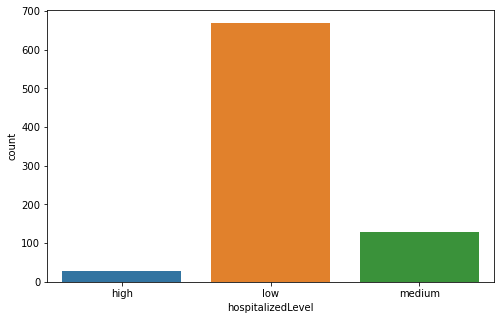

In [611]:
plt.figure(figsize=(8, 5))

# bar plot
sns.countplot(x = "hospitalizedLevel", data = covid)

If we want the bars to align vertically, we just pass in the variable to the `y` argument, instead of `x`. Bar plots allow us to compare the counts among categories easily, since we just need to compare the heights of the bars by looking at the upper edge of the bars.

The categorical variable we have here is ordinal, which means the categories (levels) have ordering. Our bars in the plot above are not ordered reasonably, so we would want to rearrange the bars. Luckily, we can do that easily using the `order` argument. 

(In fact, a better way of solving this once and for all is to specify level order in our data frame using pandas' functions. But since that's technically part of data-preprocessing, we will not talk about that here, and will keep using the `order` argument as a workaround for demonstration purposes.)

<AxesSubplot:xlabel='hospitalizedLevel', ylabel='count'>

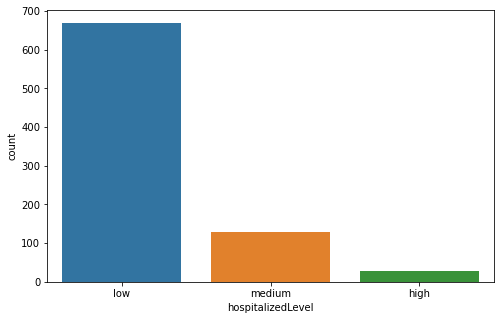

In [612]:
plt.figure(figsize=(8, 5))

# bar plot with levels rearranged
sns.countplot(x = "hospitalizedLevel", data = covid, 
              order = ["low", "medium", "high"])

If we want to put percentage on the y-axis instead of count, things can get a little bit messy. There are other libraries with which we can do this more easily, such as [Dexplot](https://www.dexplo.org/dexplot/). But if we really want to use seaborn for it, there are several workarounds. Firstly, we can make another data frame to store each category and its percentage, pass that data frame into another function called `barplot`, and specify the category as `x` and the percentage as `y`. If we want proportion on the y-axis, we can also use `histplot` with `stat = "probability"` and `discrete = True`, as shown below. However, we cannot really change the ordering on the x-axis, so this workaround won't always make sense for ordinal variables.

<AxesSubplot:xlabel='hospitalizedLevel', ylabel='Probability'>

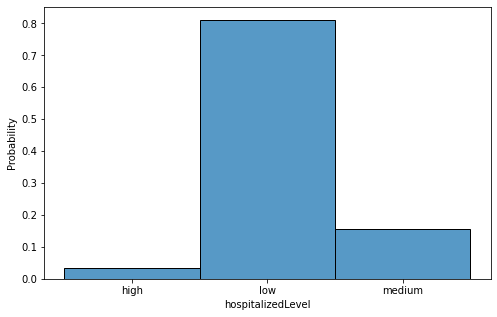

In [613]:
plt.figure(figsize=(8, 5))

# bar plot with percentage
sns.histplot(x = "hospitalizedLevel", data = covid, 
             stat = "probability", discrete = True)

For a comprehensive list of arguments for `countplot`, check out [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html).

### (b) Pie Chart

You must have seen a pie chart somewhere. News networks use pie charts in their broadcasting, managers and workers use pie charts in their work reports, they are seen everywhere. I recall myself seeing so many pie charts that I feel like it's unfair to not talk about it here.

Interestingly enough, seaborn does not support pie charts, so if you really want to make one, you need to resort to `matplotlib`. But this decision, as well as many other decisions to not include certain "popular" graphs (such as stacked bar plots, which we will discuss in the next section), is not coming out of nowhere. 

As mentioned earlier, when it comes to categorical variables, we are often interested in comparisons across categories. In a pie chart, each pie has equal radius, and it's the angles that are proportionate to the counts, which means what we are comparing in a pie chart is basically the angle of different pies. This becomes a problem because people are not as good as comparing angles as they think. When there are close counts across categories, it becomes unnecessarily hard to tell at first sight which one is the biggest/smallest. 

Let's use some dummy numbers to demonstrate a (very) bad usage of pie charts. Suppose we have three categories whose percentage is 33%, 36%, and 31%, respectively. We then use `matplotlib` to make a pie chart to visualize the three percentages. The labels are left out intentionally - without any label and legends, can you tell the color corresponding to each percentage? In other words, can you tell which slice is the biggest or the smallest?

([<matplotlib.patches.Wedge at 0x7faadac52580>,
 [Text(0.5599455183205815, 0.9468162527717273, ''),
  Text(-1.0978293924762963, -0.06906971127148508, ''),
  Text(0.6182918791840069, -0.9097885205557991, '')])

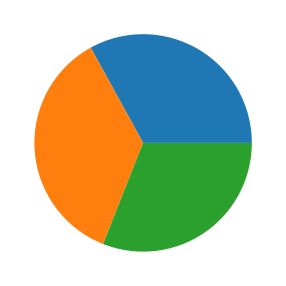

In [616]:
plt.figure(figsize=(5, 5))

# pie chart - demonsration of bad usage
dummy_data = [33, 36, 31]
plt.pie(dummy_data)

You may ask that, well, if it's hard to compare the pies by themselves, why not just overlay the percentage on top of each pie to avoid confusions? Overlaying percentages on top of course makes a pie chart less confusing, but at that point we are essentially just relying on the numbers themselves to make comparisons, which defeats the purpose of data visualization. If we are not helping the readers make comparisons by providing intuitive visuals, why not just use a contingency table with percentage listed?

I am not going to say that using pie charts is a hard pass - there may be cases where the use of a pie chart can be justified. However, you can almost always use a bar plot instead of a pie chart to fulfill the same mission, with easier comparisons and less confusions.

### (c) Point Plot

If we want something like a bar plot, but with a point representing the count of each category and lines connecting the points instead of bars, we can use a line plot. There is a `pointplot` function in seaborn, but that is for visualizing a categorical variable and some estimator of a quantitative variable. Therefore, to make a line plot of counts we need a workaround by aggregating our data first using pandas' `groupby` function, so that we have a variable (which contains the count of each category) to pass into `pointplot`. 

[Text(0, 0.5, 'count')]

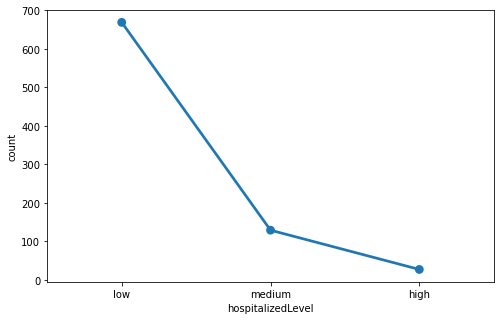

In [618]:
plt.figure(figsize=(8, 5))

# group the data by hospitalizedLevel, then find the sum of observations under each group
covid_temp = covid.groupby("hospitalizedLevel", as_index = False).size()
# point plot
sns.pointplot(x = "hospitalizedLevel", y = "size", data = covid_temp, 
              order = ["low", "medium", "high"]).set(ylabel = "count")

In the code above, we rearrange the levels in increasing order using `order` just like what we did for the bar plot. A point plot provides the same information compared to a bar plot, except for two differences. Firstly, we can see the trend of counts as `hospitalizedLevel` increases more clearly. In this case, the higher `hospitalizedLevel` is, the fewer observations there are. 

Note that since line segments naturally have slopes, lines are usually interpreted to be related to the trend of data, which makes a point plot an ideal choice only if the categorical variable on the x-axis is ordinal, i.e. when the categories have orders. If there is no ordering on the x-axis, it doesn't really make much sense to use a point plot, since the line segments can be misleading by making it seem like you are trying to show some trend across categories.

Secondly, notice how a point plot seems to be less compact than a bar plot since it doesn't have bars to take up most of the spaces in the plot. This trait can be useful when we want to add another categorical variable, for example if we want to see the distribution of `hospitalizedLevel` under each `state`. In this case, having three sets of points and lines instead of three sets of bars may result in a cleaner visual. We will discuss more about this in the next section.

For a comprehensive list of arguments for `pointplot`, check out [seaborn.pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html).

<a id="6"></a>
## 6. Visualization: Incorporating More Dimensions of Categorical Data

In section 4 we have seen how to add more categorical variables to a plot visualizing 1D quantitative data by facetting the plot, using different colors and stacking the elements or putting them side-by-side, etc. Here we will do the same thing and see some variations of the plots we just introduced in section 5.

The tricks here are mostly the same as what we have seen in section 4. Now let's use them to visualize the distribution of `hospitalizedLevel` conditioned on `state`.

### (a) Variations of Bar Plots

If we want to show not only the count under each combination of `hospitalizedLevel` and `state`, we need three "sets" of bars, one set for each `state`. There are three ways of doing that: a side-by-side bar plot, a stacked bar plot, or a faceted bar plot.

To make a side-by-side bar plot, we pass in the `hue` argument to `countplot`.

<AxesSubplot:xlabel='hospitalizedLevel', ylabel='count'>

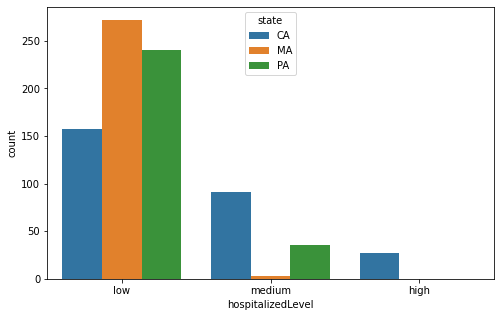

In [619]:
plt.figure(figsize=(8, 5))

# side-by-side bar plot
sns.countplot(x = "hospitalizedLevel", data = covid, 
              order = ["low", "medium", "high"], hue = "state")

In the plot above, we can see two things clearly. First of all, by looking at bars of the same color each time, we can compare the conditional distribution of `hospitalizedLevel` under different `state`. Secondly, by looking at the three bars grouped together at each value of x-axis each time, we can see the conditional distribution of `state` under different `hospitalizedLevel` as well. However, it is harder to see the marginal distribution of `hospitalizedLevel` or that of `state` alone.

If we use a stacked bar plot instead, we will be able to see the marginal distribution of `hospitalizedLevel`, but may not be able to see conditional distributions as easily, which defeats the purpose of adding another categorical variable to the bar plot. For this season, the developer of seaborn didn't develop the feature of stacked bar plots. If we want to make one, we can use [matplotlib](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html).

Seaborn does support faceted bar plot, achieved by calling `catplot` like what we did to make a faceted box plot, but this time we only specify the `x` argument, and set `kind = "count"`. By setting `col = "state"`, we get a separate bar plot for each `state`, as shown below.

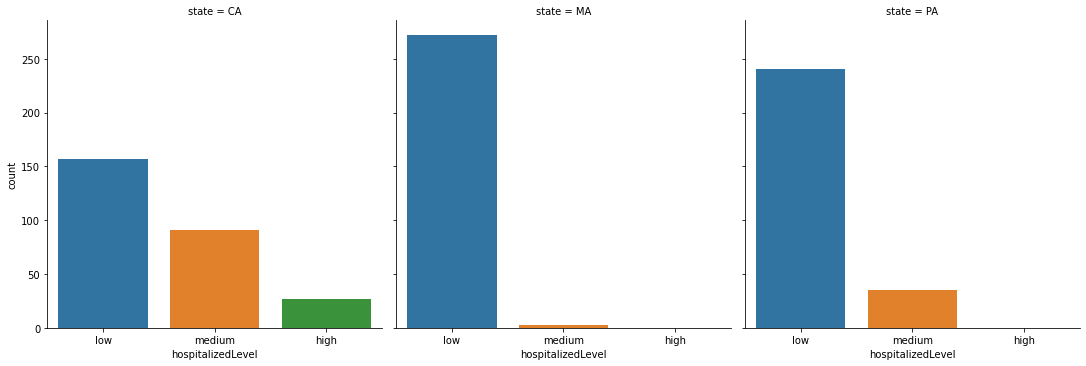

In [314]:
# facetted bar plot
sns.catplot(x = "hospitalizedLevel", data = covid, 
            order = ["low", "medium", "high"], col = "state", kind = "count")

### (b) Variations of Point Plot

Since a point plot is basically a bar plot with bars replaced by connected points, we have similar variations of point plot if we want to add more categorical variables. Note that there is not really a "stacked" or "side-by-side" point plot. We can just have multiple sets of lines in the same point plot. 

To do that in seaborn, we first aggregate the data by both categorical variables, then use the `hue` argument in our call to `pointplot` as follows.

[Text(0, 0.5, 'count')]

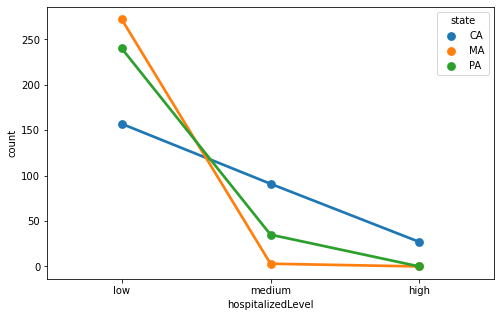

In [620]:
plt.figure(figsize=(8, 5))

# group the data by hospitalizedLevel and state, then find the sum of observations under each group
covid_temp = covid.groupby(["hospitalizedLevel", "state"], as_index = False).size()

# point plot with multiple layers
sns.pointplot(x = "hospitalizedLevel", y = "size", data = covid_temp, 
              order = ["low", "medium", "high"], hue = "state").set(ylabel = "count")

Using the `dodge` argument, we seperate the points of different `state` at each `hospitalizedLevel` to make overlapping points visible.

[Text(0, 0.5, 'count')]

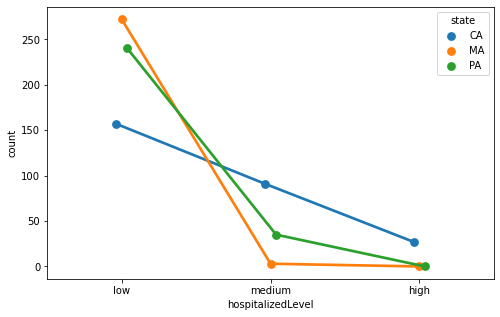

In [621]:
plt.figure(figsize=(8, 5))

# point plot with multiply layers, dodged
sns.pointplot(x = "hospitalizedLevel", y = "size", data = covid_temp, 
              order = ["low", "medium", "high"], hue = "state", dodge = True).set(ylabel = "count")

A faceted point plot may not seem very meaningful in this case, but remember that facetting is very useful if we are adding more than one categorical variables. Here, we will aggregate the data by both categorical variables first to find out the count. Then, we pass our new data frame into `catplot`, specify `col = "state"` and `kind = "point"` to facet the point plot according to `state`. 

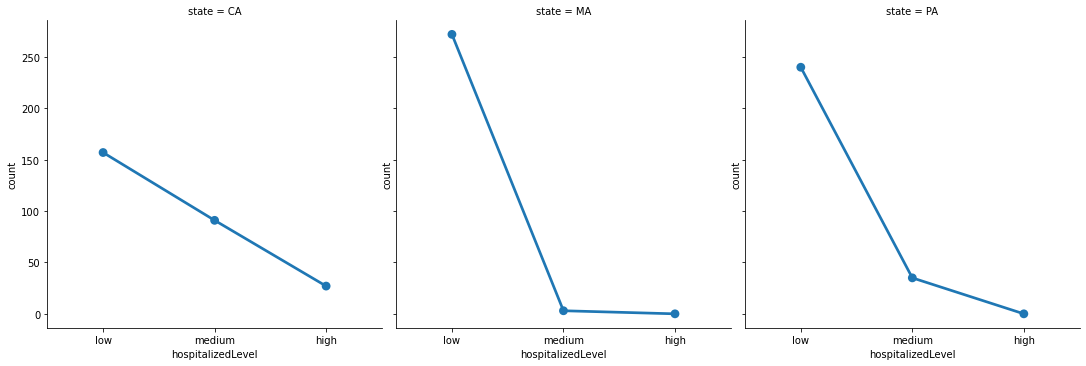

In [534]:
# group the data by hospitalizedLevel and state, then find the sum of observations under each group
covid_temp = covid.groupby(["hospitalizedLevel", "state"], as_index = False).size()

# facetted point plot
sns.catplot(x = "hospitalizedLevel", y = "size", data = covid_temp, 
            order = ["low", "medium", "high"], col = "state", kind = "point").set(ylabel = "count")

<a id="7"></a>
## 7. Visualization: 2D Quantitative Data

Now, let's see how to visualize the relationship between two quantitative variables. We will also talk about incorporating more variables in addition to the two quantitative variables in this section as well. In the examples below, we will visualize the relationship between `deathIncrease` and `hospitalizedCurrently`.

### (a) Scatter Plot

In a scatter plot, every observation shows up as a point, whose coordinates are determined by the values of the two variables. A scatter plot can provide a quick overview of how the two variables of interest may be related, but beware that any graph alone is not enough to conclude the existence or type of relationship.

<AxesSubplot:xlabel='hospitalizedCurrently', ylabel='deathIncrease'>

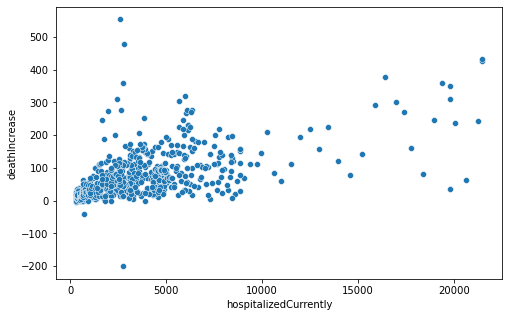

In [623]:
plt.figure(figsize=(8, 5))

# scatter plot
sns.scatterplot(x = "hospitalizedCurrently", y = "deathIncrease", data = covid)

We have less than a thousand observations in our data frame, so the scatter plot above doesn't seem too cluttered. When we have so many data points that the plot becomes too compact, we can always select a random subset of the data to visualize. (We can also decrease the point size, although there is no easy way to do this for scatter plots in seaborn.)

In a scatterplot, we can easily visualize the relationship between two quantitative variables conditioned on one or more variables by using points of different colors, sizes, shapes, or a combination of more than one aesthetics mentioned here. 

In the case of a scatter plot, these aesthetics can be changed based on either categorical or quantitative variables. In the examples below, as we talk about three arguments that control these aesthetics, we will still use a categorical variable, but just keep in mind that in `scatterplot`, you can pass in either categorical or numerical variable for `hue` and `size` (but not for `style`).

To change the color of the points, we still use `hue`. In the code below, the transparency of the points is decreased to make overlapping points visible.

<AxesSubplot:xlabel='hospitalizedCurrently', ylabel='deathIncrease'>

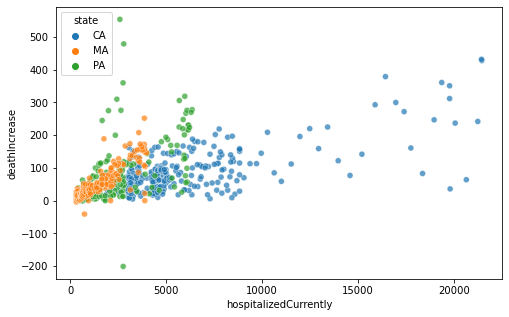

In [624]:
plt.figure(figsize=(8, 5))

# scatter plot, points colored by state
sns.scatterplot(x = "hospitalizedCurrently", y = "deathIncrease", data = covid, 
                hue = "state", alpha = 0.7)

We can also use `style` to change the shape of points according to a categorical variable.

<AxesSubplot:xlabel='hospitalizedCurrently', ylabel='deathIncrease'>

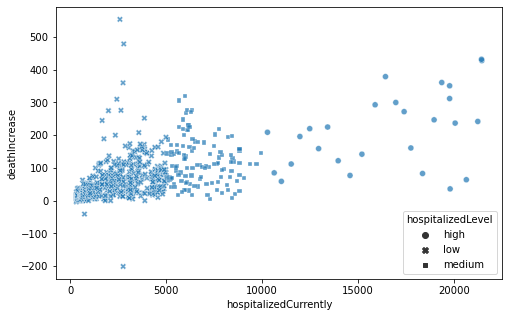

In [625]:
plt.figure(figsize=(8, 5))

# scatter plot, shaped by hospitalizedLevel
sns.scatterplot(x = "hospitalizedCurrently", y = "deathIncrease", data = covid, 
                style = "hospitalizedLevel", alpha = 0.7)

To control the size of points according to a variable, which in this case can be either categorical or numerical, we use `size`.

<AxesSubplot:xlabel='hospitalizedCurrently', ylabel='deathIncrease'>

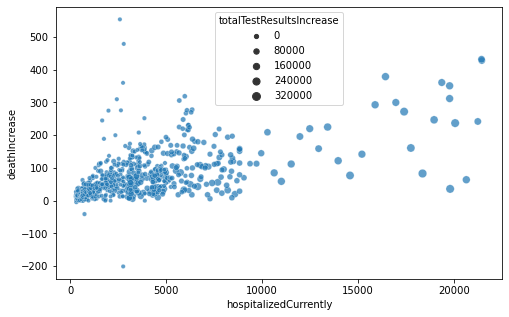

In [626]:
plt.figure(figsize=(8, 5))

# scatter plot, sized by totalTestResultsIncrease
sns.scatterplot(x = "hospitalizedCurrently", y = "deathIncrease", data = covid, 
                size = "totalTestResultsIncrease", alpha = 0.7)

We can of course control these aesthetics together in one plot, and essentially adding as many as three additional dimensions of information into the same plot. However, unless there are rather few data points, the plot will usually get cluttered with that much information, and the plot soon becomes too overwhelming to be interpreted easily. Therefore, we should always be careful when we are adding more variables to a plot.

We can facet a scatter plot by using `relplot`. The remaining syntax is the same as when we call `displot` or `catplot`. Although not shown in the code below, we can further pass in the aesthetics arguments we discussed above (`hue`, `style`, and `size`) to add more variables to each subplot.

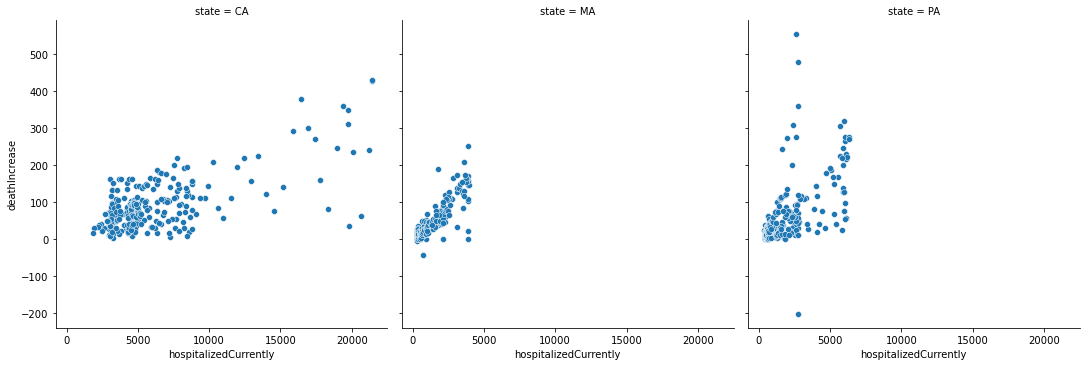

In [365]:
# facetted scatter plot
sns.relplot(x = "hospitalizedCurrently", y = "deathIncrease", data = covid, col = "state")

If we want to overlay a linear regression fit on top of a scatter plot, we need to use another function, `regplot`. By default, a confidence interval is shown. We can control the confidence interval by passing in a number in \[0, 100\] to the `ci` argument, or set it to `None` if we don't want it to show.

<AxesSubplot:xlabel='hospitalizedCurrently', ylabel='deathIncrease'>

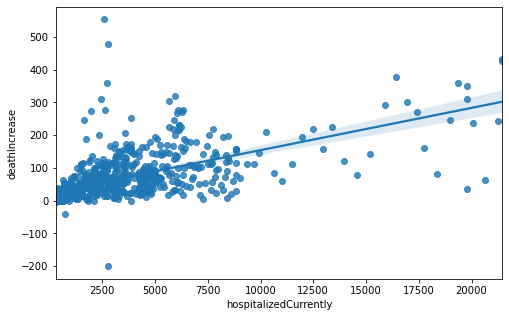

In [627]:
plt.figure(figsize=(8, 5))

# scatter plot with linear regression fit
sns.regplot(x = "hospitalizedCurrently", y = "deathIncrease", data = covid)

We can also overlay a LOWESS fit (locally weighted smoothing) instead of a linear regression, using the exact same syntax plus `lowess = True`. The model estimation is done using another library, `statsmodels`, so we will need to install and import it before we can draw a LOWESS curve.

If we only want the linear regression or LOWESS fit line/curve, we use the same code with `scatter = False`.

For a comprehensive list of arguments for `scatterplot` and `regplot`, check out [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) and [seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot).

### (b) Contour Plot

Although a scatter plot allows us to see the relationship between two variables, it's not very easy to see their joint distribution especially when there are many observations, because the density of the points is hard to tell when the points are cluttered. We can resort to a contour plot, where each contour line represents positions with the same density.

We will use `kdeplot`, the exact function we use to draw 1D density curve. To calculate 2D density instead, the trick is simply to pass in a `y` variable.

<AxesSubplot:xlabel='hospitalizedCurrently', ylabel='deathIncrease'>

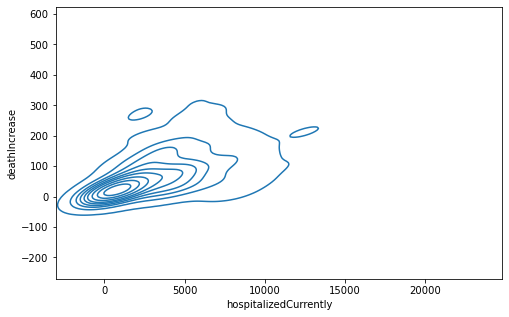

In [628]:
plt.figure(figsize=(8, 5))

# contour plot
sns.kdeplot(x = "hospitalizedCurrently", y = "deathIncrease", data = covid)

<AxesSubplot:xlabel='hospitalizedCurrently', ylabel='deathIncrease'>

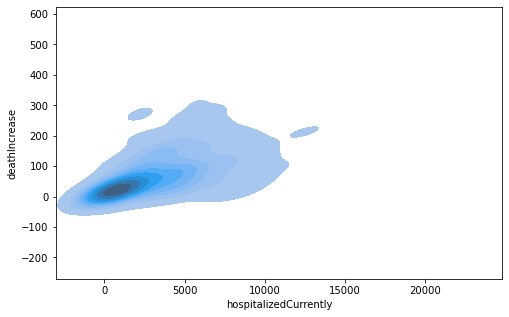

In [629]:
plt.figure(figsize=(8, 5))

# contour plot with contour lines filled
sns.kdeplot(x = "hospitalizedCurrently", y = "deathIncrease", fill = True, data = covid)

We can control the lowest density at which to draw a contour line using `thresh`, whose default value is 0.05. To change the color of contour lines, we can use `color`.

Just like other functions, we incorporate another categorical variable into a contour plot using `hue`.

<AxesSubplot:xlabel='hospitalizedCurrently', ylabel='deathIncrease'>

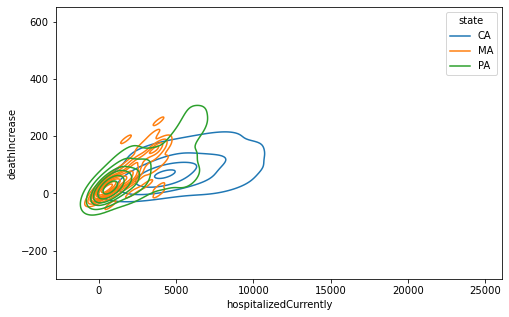

In [630]:
plt.figure(figsize=(8, 5))

# contour plot conditioned on state
sns.kdeplot(x = "hospitalizedCurrently", y = "deathIncrease", data = covid, hue = "state")

### (c) Heat Map

An alternative to a contour plot is a heat map, where the density of a given (x, y) value or range is represented by colors of different hues or intensities. 

Unfortunately, making a heat map in seaborn may require some efforts, depending on what form our data is in. The `heatmap` function in seaborn takes in a 2D data set, where the row and column are the variables we want to put on the axes of a heat map, and each entry corresponds to the density/frequency/magnitude of that corresponding (x, y) value. This is called wide-form data, where each row/column represents a value/level for the variable on the row/column (as opposed to long-form data, which is what we have here, where each row is an observation and each column is a variable). 

Most of the seaborn functions work best with long-form data, except `heatmap`. Therefore, if we have long-form data at hand, and want to use seaborn to make a heat map, we need to change the data into wide-form first. For demonstration purpose, we round `hospitalizedCurrently` to the nearest 1000, and `deathIncrease` to the nearest 10.

<AxesSubplot:xlabel='diRounded', ylabel='hcRounded'>

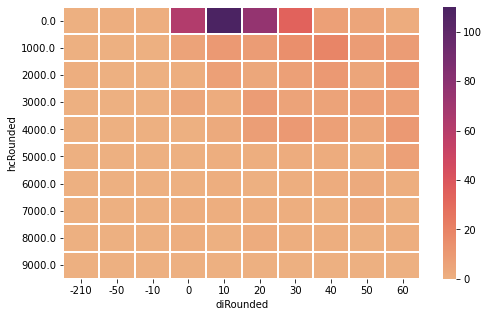

In [636]:
plt.figure(figsize=(8, 5))

# round the columns
covid[["hcRounded"]] = covid[["hospitalizedCurrently"]].apply(lambda x: x//1000*1000, axis = 1)
covid[["diRounded"]] = covid[["deathIncrease"]].apply(lambda x: x//10*10, axis = 1)
# group by the rounded values and find the count for each combination of values
covid_rounded = covid.groupby(["hcRounded", "diRounded"], as_index = False).size()
# change from long to wide format
new = covid_rounded.pivot(index = "hcRounded", columns = "diRounded", values = "size")
# fill NaNs with zeros
new = new.fillna(0)
# keep part of the data frame (matrix) with mostly non-zero values
new = new.iloc[:10, :10]

# heat map
sns.heatmap(new, linewidths = 1, cmap = "flare")

In the call to `heatmap` above, we use `linewidths` to specify the width of borders between adjacent cells so that we can see the cells clearer, while `cmap` is used to specify a color palette of our choice. 

The data we have is probably not a perfect example for demonstrating a heat map since most of the cells have very low densities. Still, we can see that the joint distribution of `hospitalizedCurrently` and `deathIncrease` has the highest density at around 0-20 `deathIncrease` and 0-1000 hospitalized currently.

For a comprehensive list of arguments for `heatmap`, check out [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap).

### (d) Line Plot

If we have a series of data points, we can use a line plot. Observations in a line plot are usually ordered by the variable on the x-axis, which is often a time series, and the line allows us to visualize the trend of the y-axis variable as the x-axis variable increases. Our data frame did record the `date` of each observation under each state, so now let's visualize `deathIncrease` over `data`. For simplicity, we use a subset of the data.

<AxesSubplot:xlabel='date', ylabel='deathIncrease'>

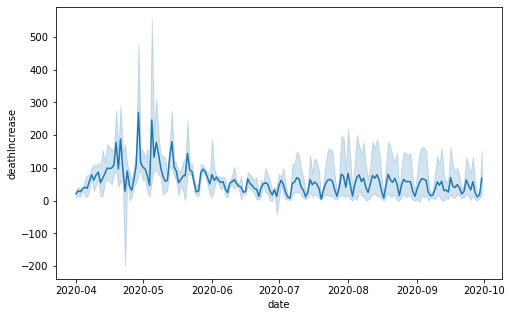

In [637]:
plt.figure(figsize=(8, 5))

# keep data between 2020-04-01 to 2020-09-30
covid_subset = covid[(covid["date"] >= "2020-04-01") & (covid["date"] <= "2020-09-30")]

# line plot for time series data
sns.lineplot(x = "date", y = "deathIncrease", data = covid_subset)

In our data, there are three observations under each `date`, one for each state that we have. When there are multiple y values at the same x value, seaborn automatically "aggregates" all y values at any x and shows a confidence interval for the aggregated value. The default estimator when aggregating these y values is their mean, but we can pass in a pandas method to the argument `estimator` to tell seaborn how we want different y values at the same x to be aggregated. If we don't want the confidence interval, we just need to set `ci = None`.

On the other hand, we can draw a separate line for each category instead of aggregating the values.

<AxesSubplot:xlabel='date', ylabel='deathIncrease'>

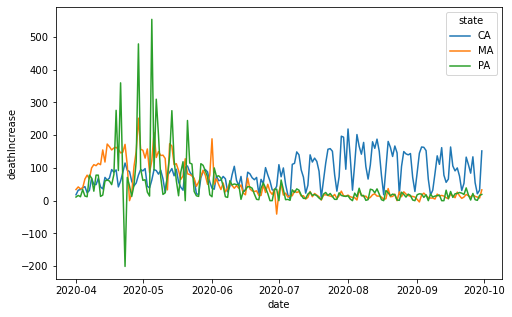

In [638]:
plt.figure(figsize=(8, 5))

# line plot for each state
sns.lineplot(x = "date", y = "deathIncrease", data = covid_subset, hue = "state")

The lines for different categories already have different colors, but in case we want to make things clearer, we can make each line have a different line type or line width by setting `style` or `size` to the categorical variable (in this case `state`), respectively.

In case we want to facet the line plot, we use the same code as the faceted scatter plot, but with an additional argument `kind = "line"` (the default value is `kind = "scatter"`).

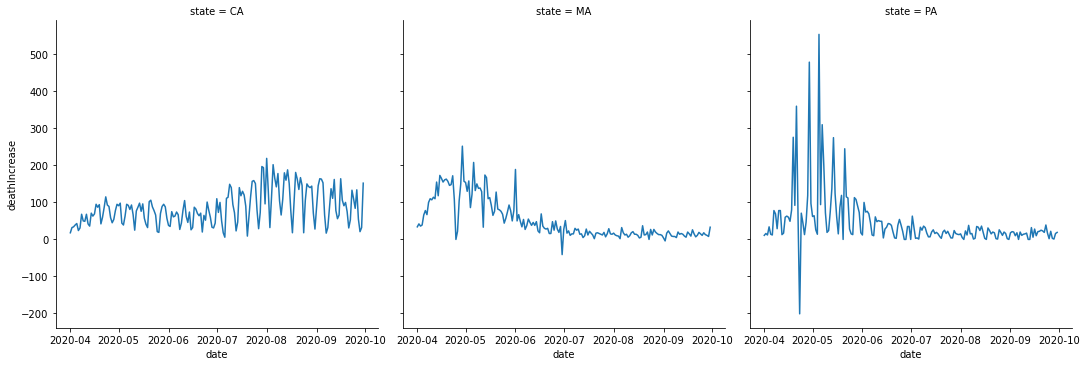

In [514]:
# facetted line plot
sns.relplot(x = "date", y = "deathIncrease", data = covid_subset, 
            col = "state", kind = "line")

For a comprehensive list of arguments for `lineplot`, check out [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot).

<a id="8"></a>
## 8. Higher Dimensional Data in General

In the sections above, we have seen how to visualize 1D categorical and quantitative data, 2D quantitative data, and how to add more dimensions of categorical data by using one or more of the following methods: 1) facet the plot, 2) have a separate set of elements (lines, points, bars, etc.) for each category, 3) use different colors/shapes/sizes for each category, or 4) use different colors/sizes for each numerical value (in the case of a scatter plot). These methods allow us to visualize high dimensional data, although we may not want to put all these information in the same plot. The advantage of data visualization is an intuitive way of representing and understanding the data, and adding too much information may make our plots unintuitive.

Things get trickier when we have many quantitative variables. We did talk about incorporating at most four quantitative variables in a scatter plot, although doing that may sacrifice the interpretability of the plot. If we want to visualize 3D quantitative data, the option of making a 3D scatter plot or contour plot is there (there are of course more choices of 3D graphs). But it can be harder to observe a 3D plot, since sometimes the pattern can only be seen clearly from certain angles, and it's hard to observe everything from only one angle. Depending on the context, we can consider making an interactive or dynamic 3D plot, in which case [matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) is the better choice. We can continue to add two more quantitative variables to a 3D scatter plot (by changing the color and size of points), although at that point the plot is most likely unreadable, unless the sample size is so small that the readers can still see the variations in points clearly.

As said again and again, avoid stuffing too much information into the same plot. If we have more dimensions of data that can be reasonably fit in one plot, make several. Try different combinations of variables, and see which ones, when visualized in the same plot, present information in the clearest way. Depending on the data and the plot, there may also be different ways of incorporating variables in the plot than those mentioned in this tutorial. But no matter what visualization method you choose, the rule of thumb is 1) be clear about what you are trying to show with your plots and 2) always keep readability in mind.

Plot aesthetics is important when it comes to making effective and readable graphs, especially when the dimension of information is high. We didn't talk much about plot aesthetics other than changing the color of elements in the plot, but seaborn offers a powerful set of tools to customize the plot's aesthetics, such as changing the style of the figure and the background, choosing a color theme, etc. If you are interested, you can check out [the tutorials on seaborn's official site](https://seaborn.pydata.org/tutorial.html).

<a id="9"></a>
## 9. Seaborn vs Matplotlib vs Other Choices

In the last section of this tutorial, let's talk about seaborn, matplotlib, and other visualization libraries in python.

First of all, seaborn is built on matplotlib. As written on [seaborn's official website](https://seaborn.pydata.org/), "it provides a high-level interface for drawing attractive and informative statistical graphics". Compared to matplotlib, seaborn has the advantages of being 1) easier to learn and use since it has simpler syntax, 2) more nice-looking with fewer efforts needed, and 3) better integrated with data frames.

When using matplotlib, it's still relatively straightforward to make basic plots, but things get harder quickly when we try to make more complex plots. In seaborn, we can make complicated plots in a few lines of code - if it is supported (here is a list of [all the supported graphs in seaborn](https://seaborn.pydata.org/examples/index.html)). However, seaborn's convenience does not come at no price. Since seaborn is a high-level interface of matplotlib, certain features may not be supported (such as stacked bar plots and pie charts), and it's hard to find a workaround using only seaborn's functions for unsupported features. 

Matplotlib, on the other hand, is highly versatile and customizable. There is almost nothing that you can't plot using matplotlib, as long as you can figure out the way. It is also more user-friendly for MATLAB users since its usage is similar to plotting in MATLAB, thus providing a smoother transition from MATLAB to Python.

There are of course numerous other choices for data visualization in python. For R users, [ggplot](https://yhat.github.io/ggpy/) may be more user-friendly due to the similarity of its syntax and that of ggplot2 in R. Note that ggplot is not the Python version of ggplot2 - it's just that they are both implementations of [Leland Wilkinson's Grammar of Graphics](https://books.google.com/books/about/The_Grammar_of_Graphics.html?id=ZiwLCAAAQBAJ&source=kp_book_description), thus having many overlapping features and syntax.

There is also [plotly](https://plotly.com/), the Python interface of plotly.js, which is a browser-based visualization library. It is compatible with both Jupyter Notebook and many web browsers, and creates highly interactive graphs. Another visualization library that is compatible with browsers is [bokeh](https://docs.bokeh.org/en/latest/index.html). There are still many, many more to be mentioned. Don't feel overwhelmed by the vast number of choices here, since you will naturally know more about the advantages and disadvantages of each when different use cases motivate you to learn new libraries as you go.